<a href="https://colab.research.google.com/github/MuthiahAinun/Proyek_Data_Science/blob/main/Proyek_Resign_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💡Proyek Data Science: [Employee-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

# **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **Data Understanding**

In [ ]:
# Load data
df = pd.read_csv("employee_data.csv")

In [ ]:
# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
print("Dataset Info:", df.info)
df.info()

Dataset Info: <bound method DataFrame.info of       EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0              1   38        NaN  Travel_Frequently       1444   
1              2   37        1.0      Travel_Rarely       1141   
2              3   51        1.0      Travel_Rarely       1323   
3              4   42        0.0  Travel_Frequently        555   
4              5   40        NaN      Travel_Rarely       1194   
...          ...  ...        ...                ...        ...   
1465        1466   38        0.0      Travel_Rarely        168   
1466        1467   50        NaN      Travel_Rarely        813   
1467        1468   28        1.0      Travel_Rarely       1485   
1468        1469   40        0.0         Non-Travel        458   
1469        1470   19        1.0  Travel_Frequently        602   

                  Department  DistanceFromHome  Education    EducationField  \
0            Human Resources                 1          4             Other   
1  

In [ ]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance        

 **Hanya kolom Attrition yang memiliki nilai kosong (missing values), yaitu sebanyak 412 data kosong. Kolom lain tidak memiliki missing values sama sekali.**

In [ ]:
# Drop kolom yang tidak diperlukan
df.drop(['EmployeeId', 'Over18', 'StandardHours'], axis=1, inplace=True)

**ketiga kolom tersebut tidak memberikan kontribusi signifikan terhadap prediksi attrition.**

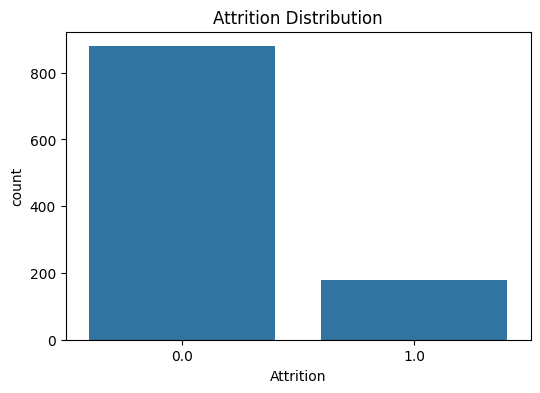

In [ ]:
# Data Visualization
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

**📊 Kesimpulan dari Visualisasi:**

1. Distribusi Tidak Seimbang (Imbalanced)

2. Mayoritas karyawan tidak mengalami attrition (Attrition = 0).

3. Hanya sebagian kecil karyawan yang mengalami attrition (Attrition = 1).

**Perbandingan Kelas**

1. Karyawan yang tetap bekerja (Attrition = 0) jauh lebih banyak (~850+).

2. Karyawan yang mengundurkan diri (Attrition = 1) jauh lebih sedikit (~200).

> Karena Distribusi tidak seimbang, Model bisa jadi terlalu fokus pada mayoritas kelas (Attrition = 0) dan mengabaikan minoritas (Attrition = 1). Solusi yang akan digunakan : menggunakan algoritma yang robust terhadap imbalance, yaitu XGBoost dan melakukan teknik oversampling menggunakan SMOTE.

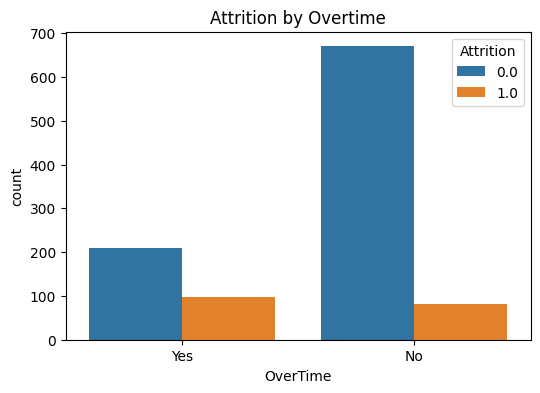

In [ ]:
# Attrition vs Overtime
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by Overtime")
plt.show()

**📊 Kesimpulan dari Visualisasi:**

**Karyawan yang Lembur (OverTime = Yes):**

1. Memiliki jumlah attrition (resign) yang lebih tinggi dibandingkan karyawan yang tidak lembur.

2. Meskipun jumlah total karyawan yang lembur lebih sedikit, proporsi mereka yang keluar lebih besar.

**Karyawan yang Tidak Lembur (OverTime = No):**

1. Sebagian besar tetap bekerja (attrition = 0).

2. Hanya sebagian kecil dari mereka yang tidak lembur mengalami attrition.

> **Lembur berlebihan berpotensi menyebabkan attrition. OverTime bisa dianggap sebagai salah satu faktor risiko attrition.**


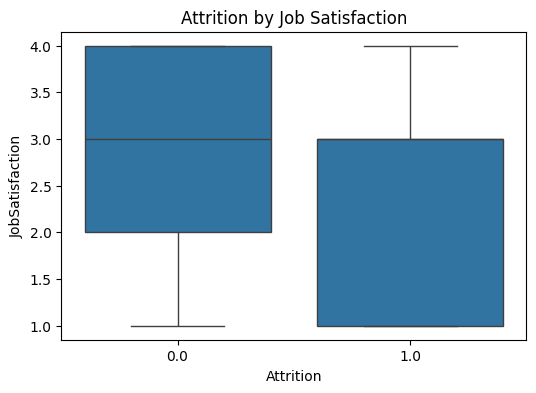

In [ ]:
# Attrition vs Job Satisfaction
plt.figure(figsize=(6,4))
sns.boxplot(x="Attrition", y="JobSatisfaction", data=df)
plt.title("Attrition by Job Satisfaction")
plt.show()

**📊 Kesimpulan dari Boxplot:**

**❎Karyawan yang Tidak Mengalami Attrition (Attrition = 0):**

1. Sebagian besar memiliki tingkat kepuasan kerja (Job Satisfaction) yang lebih tinggi, dengan median di angka 3 (High).

2. Rentang nilai kepuasan kerja lebih luas (dari 1 hingga 4), namun dominan pada level 3–4.

**✅Karyawan yang Mengalami Attrition (Attrition = 1):**

1. Median kepuasan kerja mereka berada di level 1 (Low).

2. Mayoritas memiliki kepuasan kerja rendah, dengan sebaran sempit (lebih terkonsentrasi di nilai 1–3).

> **Semakin rendah kepuasan kerja, semakin tinggi kemungkinan seseorang akan keluar dari perusahaan.**

# **Data Preparation**

In [ ]:
# Handle missing values for target
# Menghapus baris yang memiliki nilai kosong pada kolom 'attrition'
df = df[df['Attrition'].notna()]

# Mengubah nilai kolom attrition menjadi tipe integer
df['Attrition'] = df['Attrition'].astype(int)

<ipython-input-6-5e394b8055f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].astype(int)


In [ ]:
# Check kembali missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [ ]:
# Split features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [ ]:
# Identify categorical & Numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Pipeline praproses
from sklearn.pipeline import Pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

In [ ]:
# Preprocess data
X_processed = preprocessor.fit_transform(X)

In [ ]:
import joblib

# Simpan pipeline ke file
joblib.dump(preprocessor, "pipeline.pkl")

['pipeline.pkl']

In [ ]:
print(df['Attrition'].value_counts())

Attrition
0    879
1    179
Name: count, dtype: int64


In [ ]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_processed, y)

In [ ]:
# Sebelum SMOTE
print("Distribusi sebelum SMOTE:")
print(y.value_counts(normalize=True))

# Setelah SMOTE
print("\nDistribusi setelah SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Distribusi sebelum SMOTE:
Attrition
0    0.830813
1    0.169187
Name: proportion, dtype: float64

Distribusi setelah SMOTE:
Attrition
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# **Modeling**

In [ ]:
# Train XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# **Evaluation**

In [ ]:
# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       176
           1       0.95      0.88      0.91       176

    accuracy                           0.92       352
   macro avg       0.92      0.92      0.92       352
weighted avg       0.92      0.92      0.92       352

Accuracy: 0.9176136363636364


### **Save Model**

In [ ]:
import joblib
# Simpan model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

### **Menentukan Nilai Threshold**

Melakukan optimasi threshold untuk:

- Menyesuaikan performa model dengan tujuan sebenarnya.

- Menangani distribusi data yang tidak seimbang.

- Meningkatkan kemampuan model dalam menangani kasus kritis seperti prediksi resign.

> Secara garis besar nilai optimal treshold yang didapatkan akan diterapkan ketika melakukan prediksi resign agar hasil prediksi yang dihasilkan lebih akurat.

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score
import numpy as np

# Prediksi probabilitas
y_probs = model.predict_proba(X_test)[:, 1]

# Buat precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

In [ ]:
# Hitung F1 untuk setiap threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold optimal (F1 tertinggi): {best_threshold:.2f}")

Threshold optimal (F1 tertinggi): 0.28


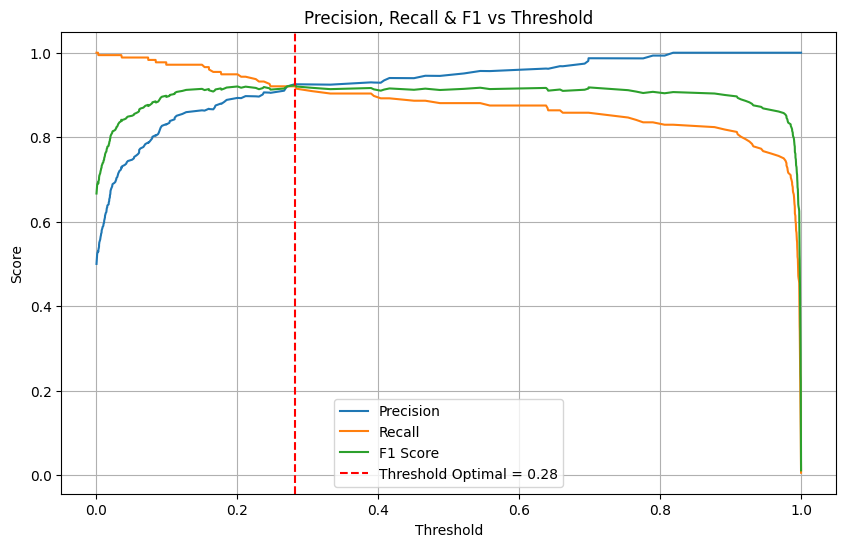

In [ ]:
# Plot kurva
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Threshold Optimal = {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Prediksi dengan threshold terbaik
y_pred_optimal = (y_probs >= best_threshold).astype(int)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Threshold Optimal):")
print(classification_report(y_test, y_pred_optimal))

Classification Report (Threshold Optimal):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       176
           1       0.93      0.92      0.92       176

    accuracy                           0.92       352
   macro avg       0.92      0.92      0.92       352
weighted avg       0.92      0.92      0.92       352



### **🔍 Kesimpulan dari Threshold Optimal (0.28)**

**✅ Performa Model Sangat Baik (Akurasi 92%)**

Dengan threshold ini, model berhasil mempertahankan akurasi keseluruhan sebesar 92%, yang menunjukkan bahwa prediksi secara umum sangat andal.

**⚖️ Keseimbangan Precision dan Recall di Kedua Kelas**

**Kelas 0 (Tidak Resign):**

1. Precision: 0.92 → Dari semua prediksi “tidak resign”, 92% benar.

2. Recall: 0.93 → Dari semua karyawan yang benar-benar “tidak resign”, 93% berhasil dikenali model.

**Kelas 1 (Resign):**

1. Precision: 0.93 → Dari semua prediksi “resign”, 93% benar-benar resign.

2. Recall: 0.92 → Dari semua yang benar-benar resign, 92% berhasil dikenali.

Hal ini menunjukkan model seimbang dan adil terhadap kedua kelas, bahkan pada dataset yang awalnya tidak seimbang.

**🎯 F1-Score Tinggi dan Stabil di Kedua Kelas (0.92)**
F1-score yang tinggi dan merata menunjukkan bahwa model tidak hanya fokus pada satu kelas saja, tetapi berhasil menjaga kualitas prediksi untuk kedua kelas dengan konsisten.

**📉 Threshold 0.28 Lebih Efektif dari Default (0.5)**
Dengan menurunkan threshold ke 0.28, model menjadi lebih sensitif terhadap kemungkinan resign, tanpa mengorbankan akurasi atau menambah terlalu banyak false positive.

### **Save Threshold**

In [ ]:
import json
# Simpan threshold optimal
threshold = 0.28
with open('optimal_threshold.json', 'w') as f:
    json.dump({'threshold': threshold}, f)

## **Fature Importance**

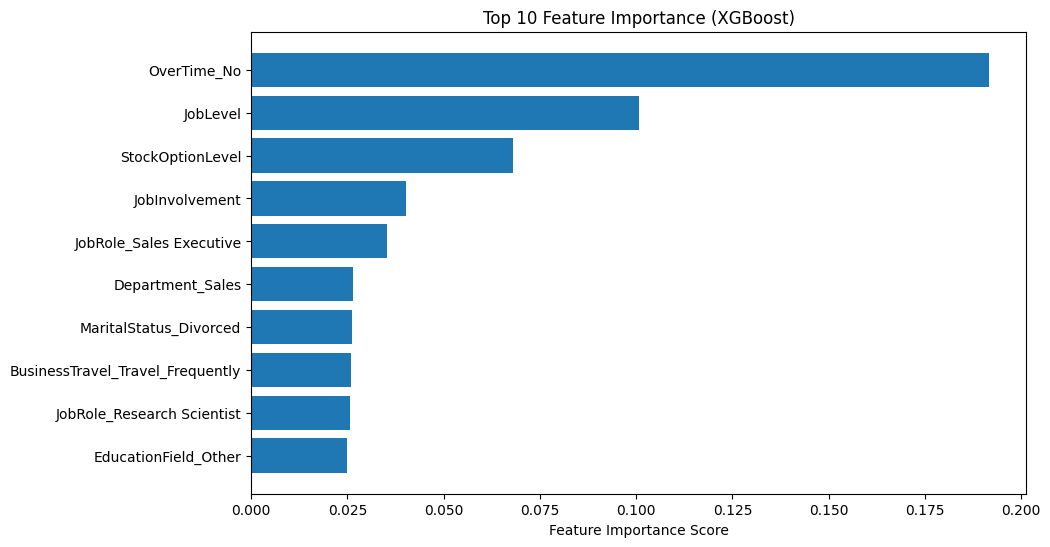

In [ ]:
# Plot feature importance dari model XGBoost
import xgboost as xgb
plt.figure(figsize=(10,6))
plt.barh(range(10), importances[sorted_idx], align='center')
plt.yticks(range(10), [feature_names[i] for i in sorted_idx])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Feature Importance (XGBoost)")
plt.show()

## **🔍 Analisis Fitur Penting Terhadap Prediksi Model**

Berdasarkan hasil evaluasi feature importance dari model XGBoost yang telah dioptimalkan, diperoleh bahwa beberapa fitur memiliki kontribusi signifikan terhadap keputusan model dalam memprediksi target.

**✅ Fitur Paling Berpengaruh:**
1. OverTime_No

  Merupakan fitur paling dominan dengan skor importance tertinggi. Hal ini menunjukkan bahwa status lembur sangat berpengaruh terhadap prediksi. Karyawan yang tidak melakukan lembur cenderung memiliki pola yang berbeda terkait dengan kemungkinan bertahan atau keluar dari perusahaan.

2. JobLevel dan StockOptionLevel

  Kedua fitur ini mencerminkan posisi jabatan dan insentif kepemilikan saham. Keduanya berperan penting dalam menentukan keterikatan dan kepuasan kerja, yang pada akhirnya memengaruhi loyalitas karyawan.

3. JobInvolvement dan JobRole_Sales Executive

  Tingkat keterlibatan kerja serta jenis pekerjaan sebagai Sales Executive menunjukkan bahwa peran aktif karyawan dalam pekerjaan mereka sangat relevan terhadap hasil prediksi. Karyawan dengan keterlibatan tinggi biasanya memiliki tingkat kepuasan kerja yang lebih tinggi.

**⚖️ Fitur Lain yang Signifikan:**

1. Department_Sales, MaritalStatus_Divorced, dan BusinessTravel_Travel_Frequently

  Ketiga fitur ini berhubungan dengan unit kerja, status personal, dan frekuensi perjalanan. Meskipun kontribusinya tidak sebesar fitur utama, namun tetap memberikan informasi berharga mengenai profil karyawan yang cenderung keluar dari perusahaan.

2. JobRole_Research Scientist dan EducationField_Other

  Jenis pekerjaan serta latar belakang pendidikan juga menjadi indikator penting. Hal ini menunjukkan bahwa latar belakang profesional memengaruhi dinamika kerja dan keputusan karier.


### **📌 Kesimpulan dan Rekomendasi Strategis:**

Secara umum, model menunjukkan bahwa prediksi terhadap target sangat dipengaruhi oleh kombinasi faktor pekerjaan (lembur, tingkat jabatan, keterlibatan kerja), serta faktor personal dan demografis (status perkawinan, jenis pekerjaan, dan pola perjalanan kerja).

👉 Oleh karena itu, perusahaan dapat memanfaatkan informasi ini untuk:

1. Menyusun strategi retensi karyawan yang lebih terfokus pada kelompok rentan.

2. Mengevaluasi ulang kebijakan lembur dan kompensasi.

3. Mengembangkan program pengembangan karier dan pelatihan yang relevan dengan job level dan role.

4. Menggunakan wawasan ini dalam perencanaan SDM berbasis data (data-driven HR planning).